In [6]:
# Import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.subplots import make_subplots
import plotly.express as px
from xgboost import XGBClassifier
from xgboost import plot_importance
import warnings

pd.options.display.max_columns = 200
pd.options.display.max_rows = 200
init_notebook_mode(connected=False)
warnings.filterwarnings('ignore')

### Explore 2008 data to find trends amongst clusters

In [2]:
os.listdir('../data/cleaned/yearly_comment_w_clusters/')

['2008_commentors_with_clusters.csv',
 '2009_commentors_with_clusters.csv',
 '2010_commentors_with_clusters.csv',
 '2011_commentors_with_clusters.csv',
 '2012_commentors_with_clusters.csv',
 '2013_commentors_with_clusters.csv',
 '2014_commentors_with_clusters.csv',
 '2015_commentors_with_clusters.csv',
 '2016_commentors_with_clusters.csv',
 '2017_commentors_with_clusters.csv',
 '2018_commentors_with_clusters.csv',
 '2019_commentors_with_clusters.csv',
 '2020_commentors_with_clusters.csv']

In [7]:
# Load data
comments_w_clusters = os.listdir('../data/cleaned/yearly_comment_w_clusters/')
comments_with_clusters = pd.read_csv('../data/cleaned/yearly_comment_w_clusters/' + comments_w_clusters[-1], header=0, index_col=0)
# comments_with_clusters.head()

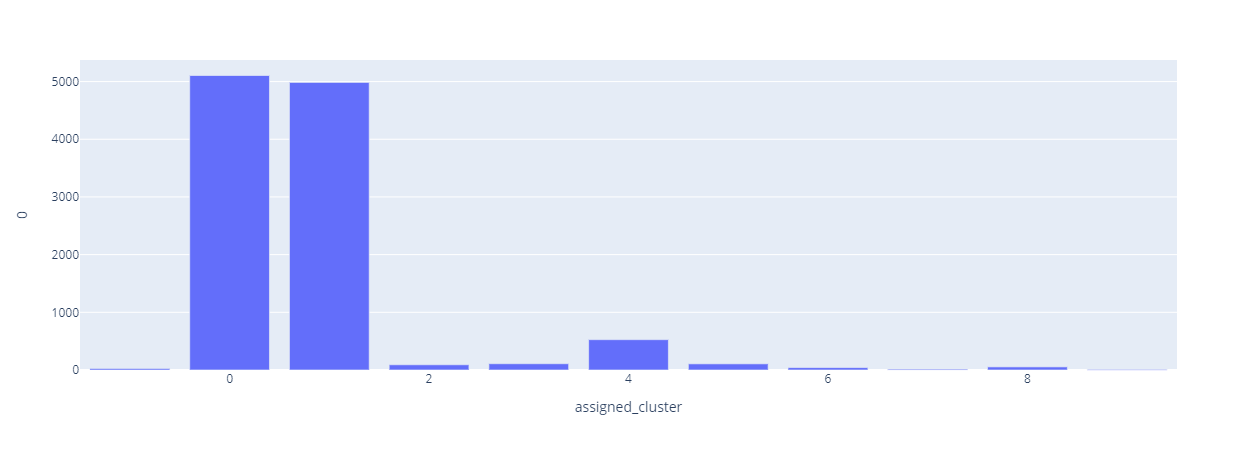

In [5]:
cluster_summary = comments_with_clusters.groupby('assigned_cluster').size().reset_index()
fig = px.bar(cluster_summary, x='assigned_cluster', y=0)
fig.show()

[13:54:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


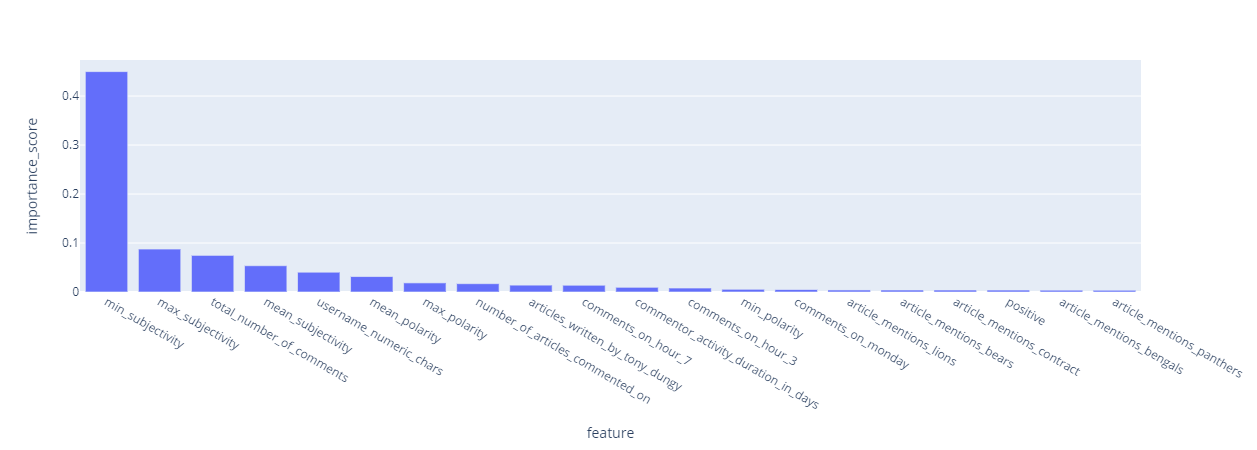

In [6]:
X = comments_with_clusters.iloc[:,:-1]
y = comments_with_clusters.iloc[:,-1]
model = XGBClassifier(random_state=42)
model.fit(X, y)

# Create feature importance df
feature_importance_df = pd.DataFrame([comments_with_clusters.columns[:-1], model.feature_importances_])
feature_importance_df = feature_importance_df.T
feature_importance_df.columns = ['feature','importance_score']
feature_importance_df.sort_values(by=['importance_score'], ascending=False, inplace=True)
# feature_importance_df.head(10)
                                     
fig = px.bar(feature_importance_df.iloc[:20,:], x='feature', y='importance_score')
fig.show()

### feature importance for all years

[10:49:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


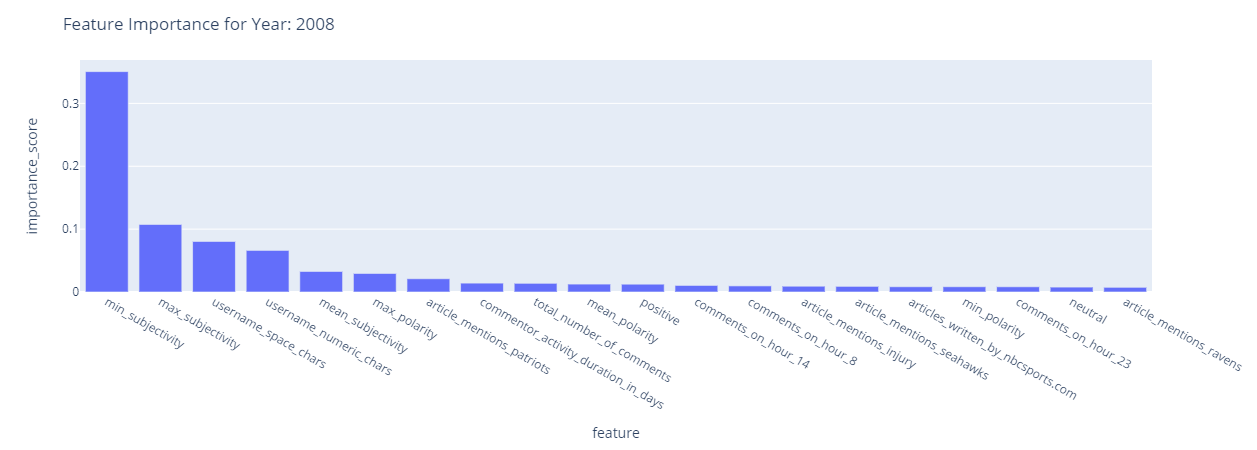

[10:49:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


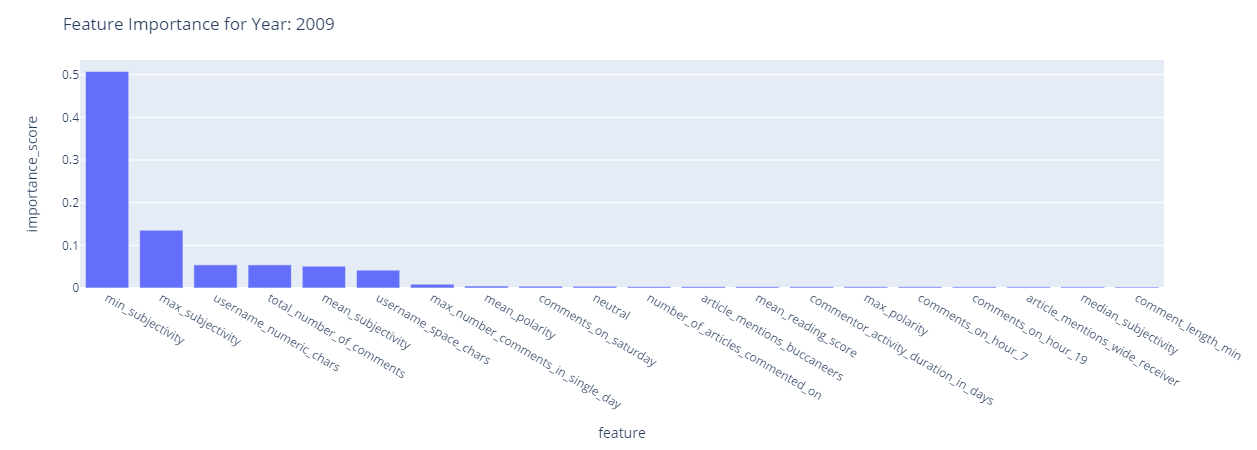

[10:49:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


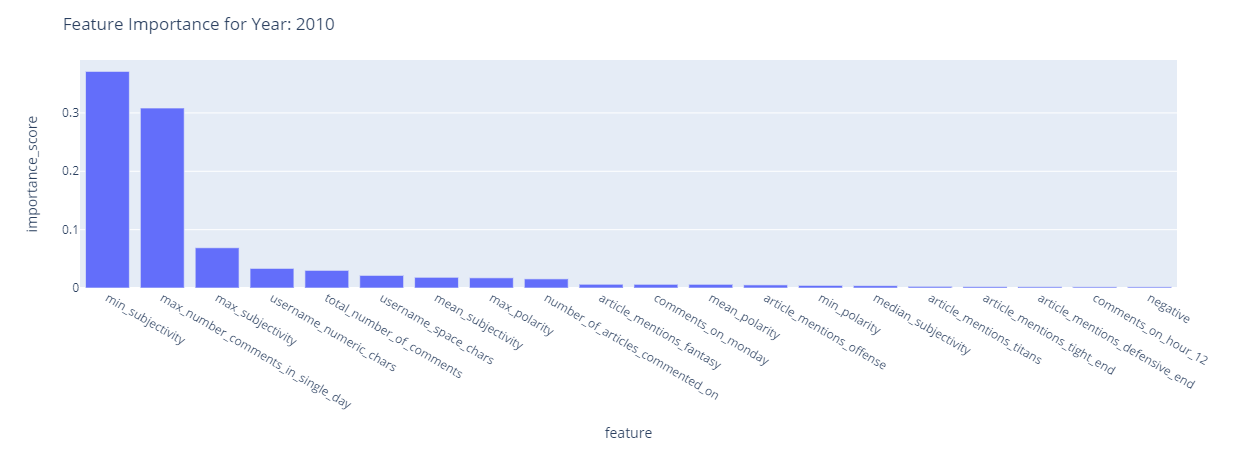

[10:50:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


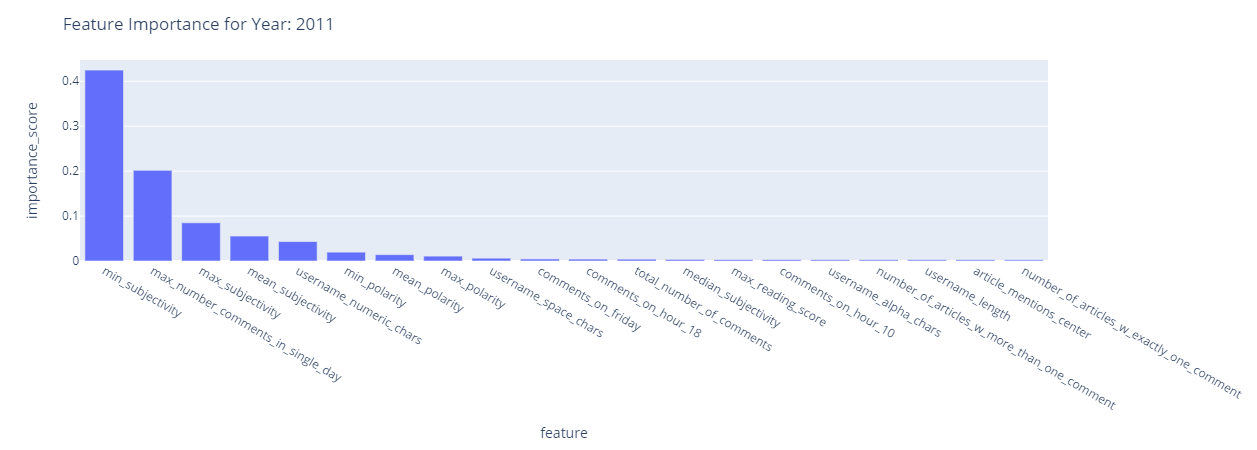

[10:51:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


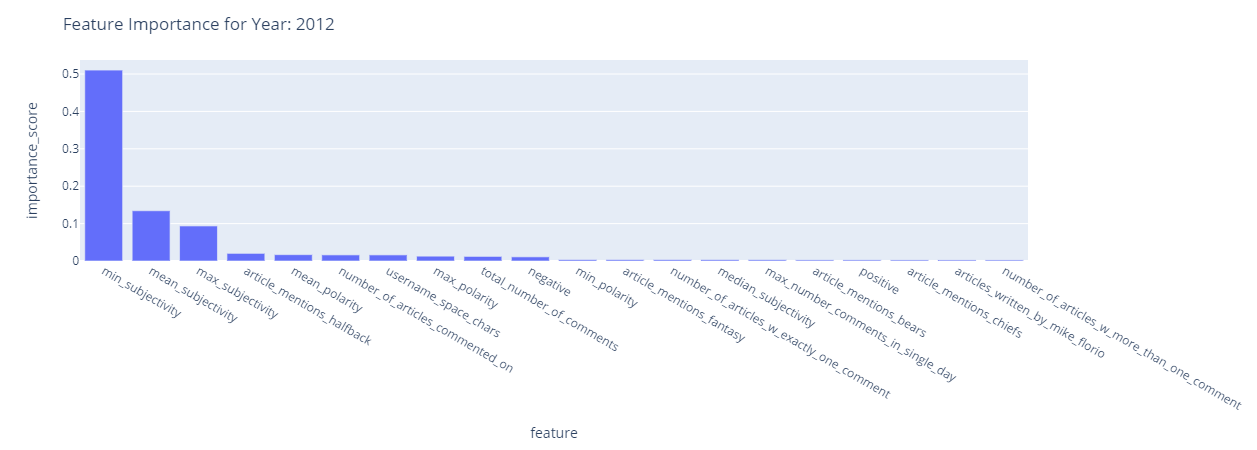

[10:51:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


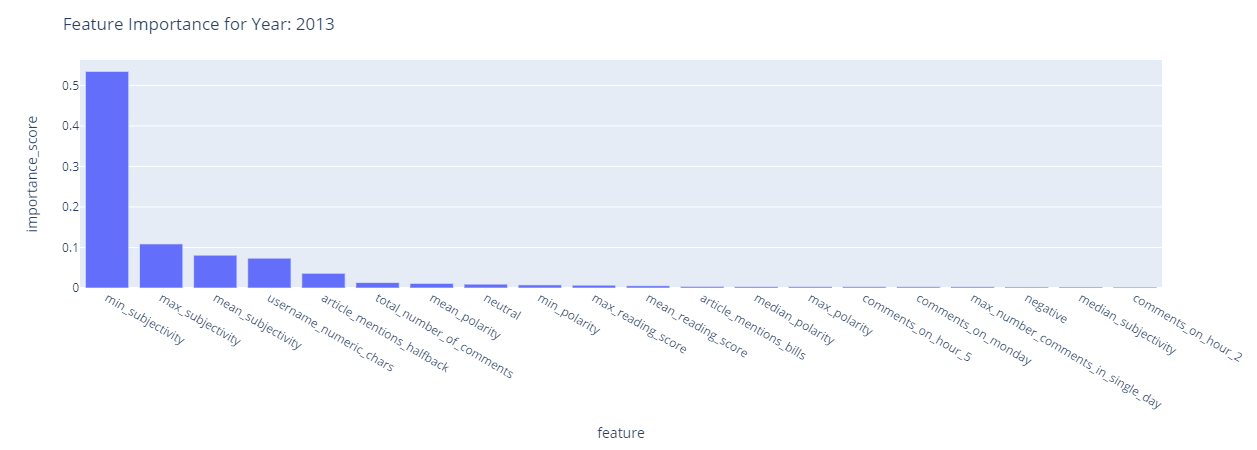

[10:52:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


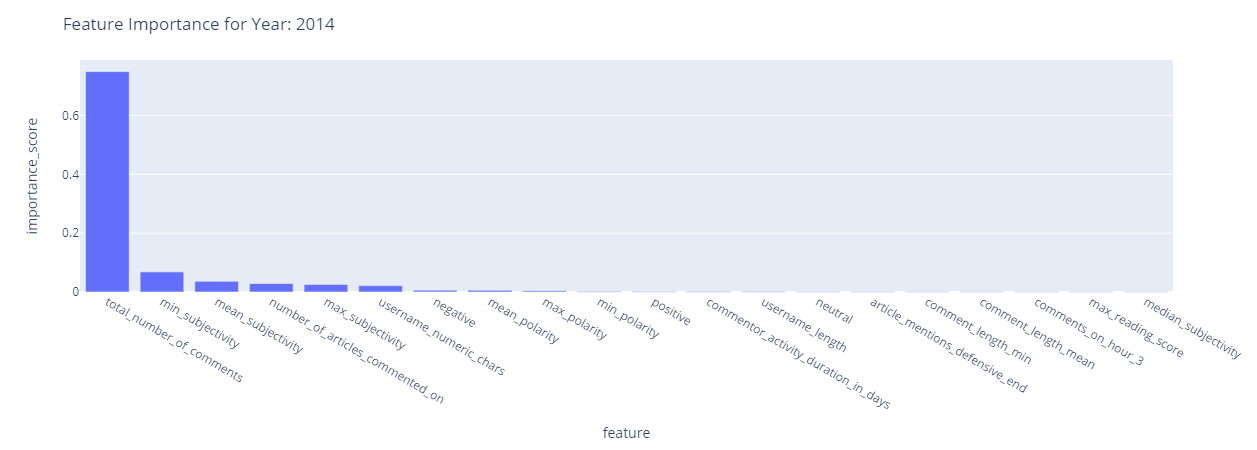

[10:53:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


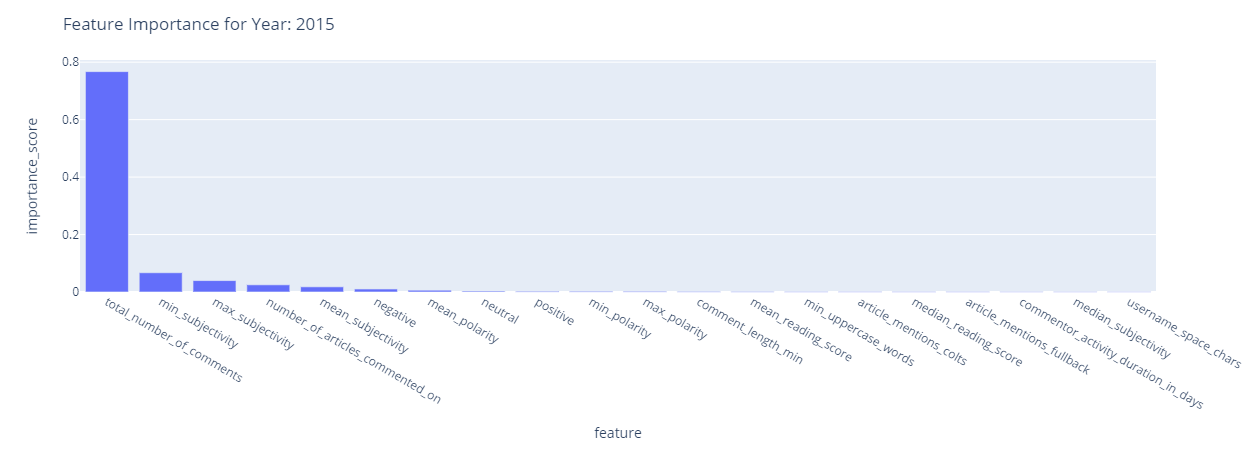

[10:54:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


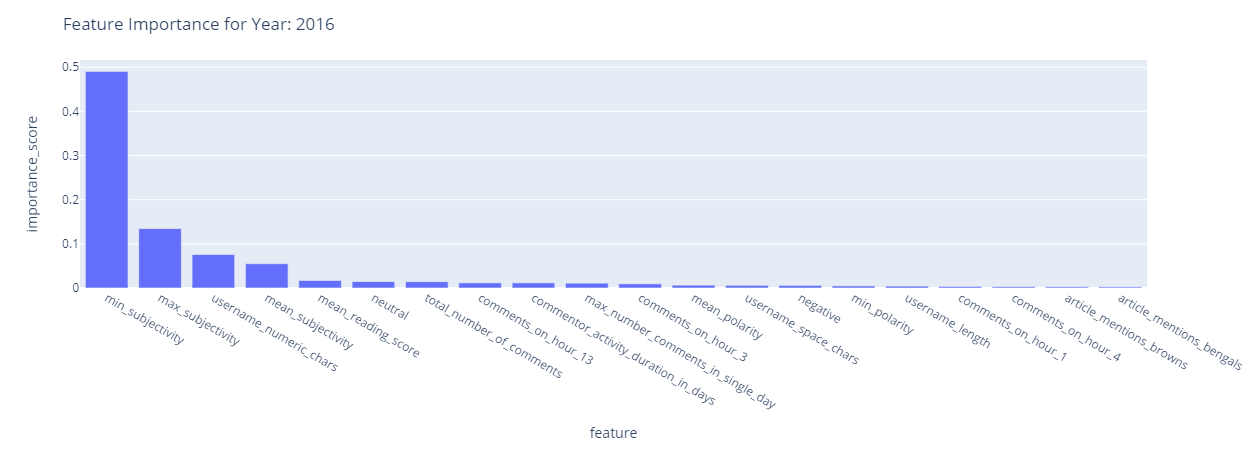

[10:54:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


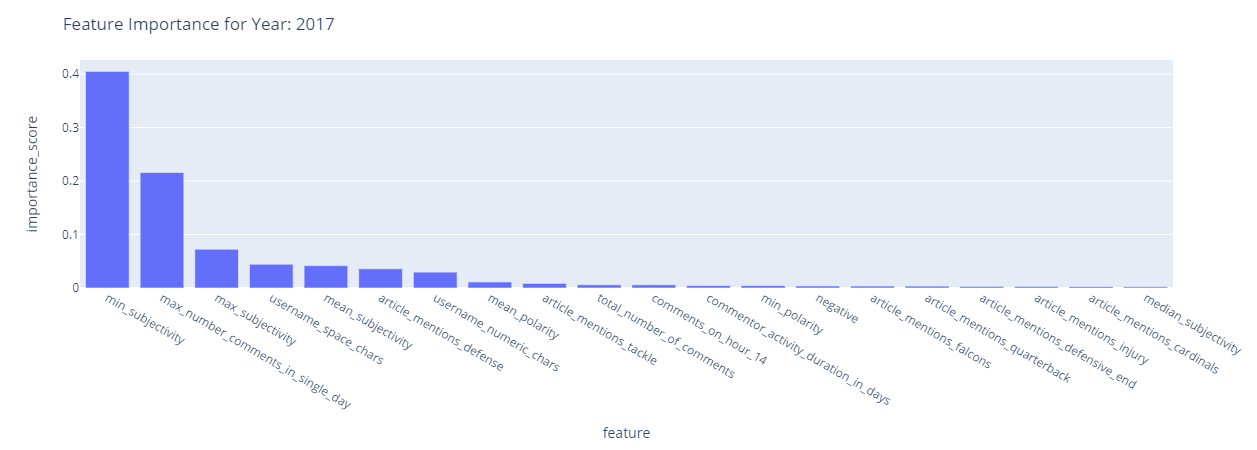

[10:55:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


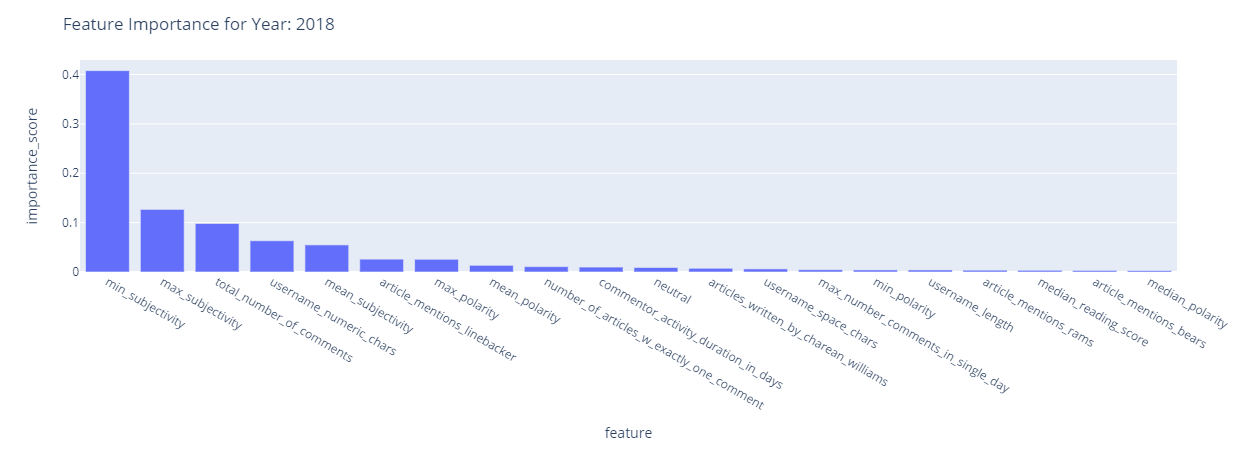

[10:55:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


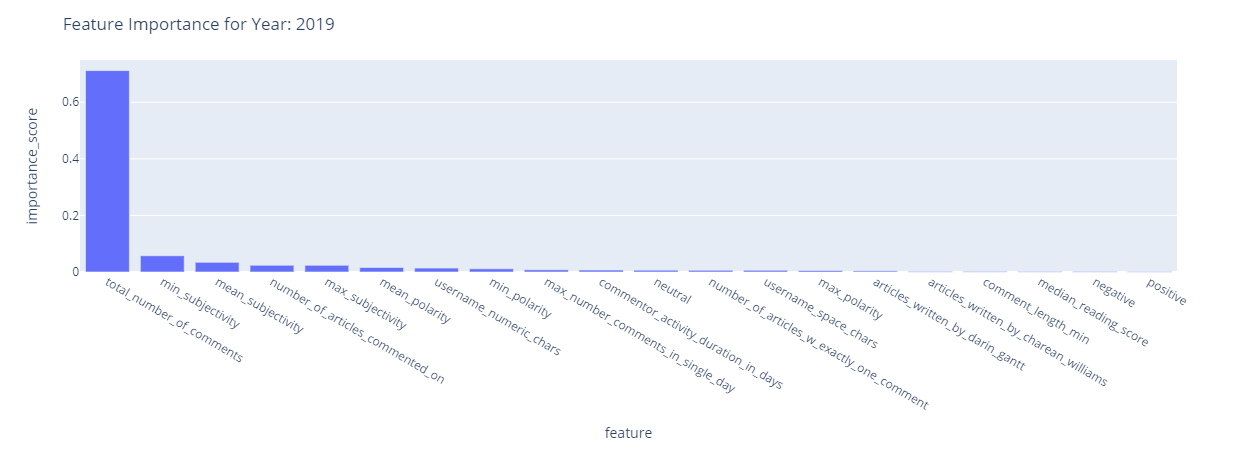

[10:56:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


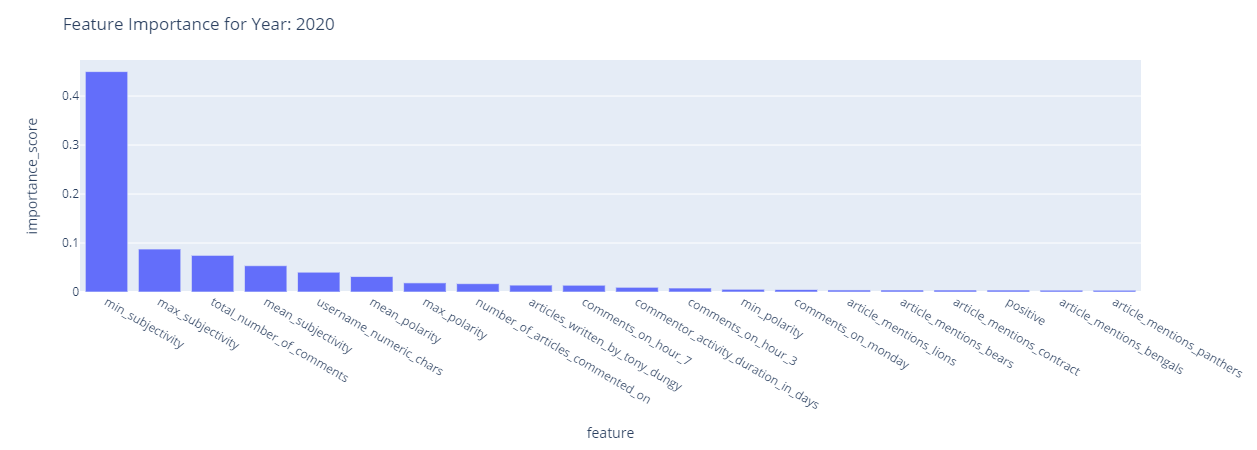

In [7]:
# Load data
comments_w_clusters = os.listdir('../data/cleaned/yearly_comment_w_clusters/')

for year in comments_w_clusters:
    comments_with_clusters = pd.read_csv('../data/cleaned/yearly_comment_w_clusters/' + year, header=0, index_col=0)

    # cluster_summary = comments_with_clusters.groupby('assigned_cluster').size().reset_index()
    # fig = px.bar(cluster_summary, x='assigned_cluster', y=0)
    # fig.show()

    X = comments_with_clusters.iloc[:,:-1]
    y = comments_with_clusters.iloc[:,-1]
    model = XGBClassifier(random_state=42)
    model.fit(X, y)

    # Create feature importance df
    feature_importance_df = pd.DataFrame([comments_with_clusters.columns[:-1], model.feature_importances_])
    feature_importance_df = feature_importance_df.T
    feature_importance_df.columns = ['feature','importance_score']
    feature_importance_df.sort_values(by=['importance_score'], ascending=False, inplace=True)
    # feature_importance_df.head(10)

    fig = px.bar(feature_importance_df.iloc[:20,:], x='feature', y='importance_score')
    fig.update_layout(title=f'Feature Importance for Year: {year[:4]}')
    fig.show()